In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
import os
print(os.listdir('/Users/mr_lurie/dynastytrial'))

['.DS_Store', 'Draft_Rounds.csv', 'Dynasty_Data.csv', 'FF_Data.csv', 'sleeper1.csv', 'testfile.csv']


In [18]:
# the "encoding = "ISO-8859-1").fillna(0)" part after the csv path takes all empty data fields
# and sets them to zero. That way , missing values won't return errors. Before implementing
# this code for my data frame, all of the missing values for the forty times would appear as 
# "nan" which is not good for your data analysis. 
dyno = pd.read_csv('/Users/mr_lurie/dynastytrial/FF_Data.csv', encoding = "ISO-8859-1").fillna(0)
dyno['PPG'] = dyno['Stats'] / dyno['Games']

In [19]:
dyno.head(30)

,Player,Value,Stats,Games,Age,Draft_Year,Position,Round,Pick,Forty,Salary,Snaps,PPG
0,Christian McCaffrey,10232,415,16,24.0,2017.0,RB,1.0,8.0,4.480,4.31,0.9130,25.937500
1,Saquon Barkley,9994,219,13,23.3,2018.0,RB,1.0,2.0,4.400,7.80,0.8296,16.846154
2,Michael Thomas,9808,299,16,27.2,2016.0,WR,2.0,16.0,4.595,19.25,0.8839,18.687500
3,Ezekiel Elliott,9292,285,16,24.9,2016.0,RB,1.0,4.0,4.470,15.00,0.8271,17.812500
4,Alvin Kamara,9184,204,14,23.9,2017.0,RB,3.0,3.0,4.530,0.96,0.6261,14.571429
5,Dalvin Cook,8866,262,14,24.8,2017.0,RB,2.0,9.0,4.525,1.59,0.4672,18.714286
6,DeAndre Hopkins,8721,218,15,28.0,2013.0,WR,1.0,27.0,4.595,16.20,0.9909,14.533333
7,Davante Adams,8619,171,12,27.4,2014.0,WR,2.0,21.0,4.560,14.50,0.8873,14.250000
8,Tyreek Hill,8599,161,12,26.2,2016.0,WR,5.0,28.0,4.340,18.00,0.8660,13.416667
9,Chris Godwin,8262,242,14,24.3,2017.0,WR,3.0,20.0,4.420,0.82,0.6430,17.285714


In [20]:
TEs = dyno[dyno.Position == 'TE']
RBs = dyno[dyno.Position == 'RB']
WRs = dyno[dyno.Position == 'WR']
QBs = dyno[dyno.Position == 'QB']

In [21]:
QBs.head(31)

# Need to fix the snap column. does not look accurate. also need to add in missing forty times

,Player,Value,Stats,Games,Age,Draft_Year,Position,Round,Pick,Forty,Salary,Snaps,PPG
24,Patrick Mahomes,5128,284,14,24.7,2017.0,QB,1.0,10.0,4.80,4.11,0.9876,20.285714
30,Lamar Jackson,4778,408,15,23.4,2018.0,QB,1.0,32.0,0.00,2.37,0.4920,27.200000
46,Kyler Murray,2757,283,16,22.8,2019.0,QB,1.0,1.0,0.00,8.79,0.0000,17.687500
49,Deshaun Watson,2545,312,15,24.7,2017.0,QB,1.0,12.0,4.66,3.46,0.9991,20.800000
51,Dak Prescott,2504,333,16,26.8,2016.0,QB,4.0,37.0,4.79,0.68,0.9944,20.812500
59,Russell Wilson,2022,323,16,31.5,2012.0,QB,3.0,12.0,4.55,35.00,1.0000,20.187500
75,Josh Allen,1110,276,16,24.0,2018.0,QB,1.0,7.0,4.75,5.30,0.6789,17.250000
79,Carson Wentz,1016,266,16,27.4,2016.0,QB,1.0,2.0,4.77,32.00,0.6630,16.625000
80,Baker Mayfield,999,225,16,25.1,2018.0,QB,1.0,1.0,4.84,8.17,0.8304,14.062500
92,Matt Ryan,697,260,15,35.0,2008.0,QB,1.0,3.0,4.95,30.00,0.9887,17.333333


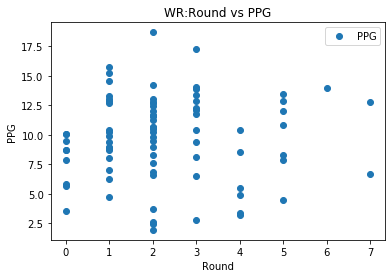

In [22]:
WRs.plot(x='Round', y='PPG', style='o')
plt.title('WR:Round vs PPG')
plt.xlabel('Round')
plt.ylabel('PPG')
plt.show()

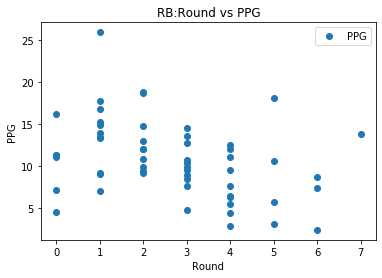

In [24]:
RBs.plot(x='Round', y='PPG', style='o')
plt.title('RB:Round vs PPG')
plt.xlabel('Round')
plt.ylabel('PPG')
plt.show()